In [1]:
import numpy as np 
import pandas as pd
from collections import defaultdict

from scipy.stats import norm

from bokeh.plotting import show, figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Viridis6


import math
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

pd.options.mode.chained_assignment = None

In [26]:
states_historical_df = pd.read_csv('https://covidtracking.com/api/states/daily.csv')
states_pop = pd.read_csv('http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv?#')
states_pop = states_pop[["NAME","POPESTIMATE2019"]][5:]

states_historical_df["date"] = pd.to_datetime(states_historical_df["date"], format="%Y%m%d").dt.date.astype(str)
date_values = states_historical_df["date"].unique()
state_map_dict = {'AL': 'Alabama',
 'AK': 'Alaska',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'FM': 'Federated States of Micronesia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MH': 'Marshall Islands',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'MP': 'Northern Mariana Islands',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PW': 'Palau',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VI': 'Virgin Islands',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming'}

state_map_dict_inverted = {y:x for x,y in state_map_dict.items()}

state_list=list(state_map_dict.keys())

states_pop = states_pop.replace({"NAME": state_map_dict_inverted})

states_historical_df_pop = pd.merge(states_historical_df, states_pop, how='inner', left_on = 'state', right_on = 'NAME').drop(columns="NAME")


states_historical_df_pop['Mortality Rate (%)']  = states_historical_df_pop["death"]*100/states_historical_df_pop["total"]

states_historical_df_pop = states_historical_df_pop.round({'Mortality Rate (%)':2})

state_list


['AL',
 'AK',
 'AS',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FM',
 'FL',
 'GA',
 'GU',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MH',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'MP',
 'OH',
 'OK',
 'OR',
 'PW',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VI',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [3]:
plot_dates = pd.date_range(date_values.min(), date_values.max())


def statefilter(state_input):
    print(type(state_input))
    return states_historical_df_pop[states_historical_df_pop["state"]== state_input]

df_by_state = {}

for state in state_list:
    df_by_state[state] = statefilter(state)
    temp_state_df = df_by_state[state]
    datetime_index = pd.DatetimeIndex(temp_state_df['date'].values)
    temp_state_df.set_index(datetime_index, inplace=True)
    temp_state_df = temp_state_df.drop('date', 1)
    temp_state_df = temp_state_df.reindex(plot_dates, fill_value=None)
    temp_state_df["state"] = temp_state_df["state"].fillna(state)
    temp_state_df["positive"] = temp_state_df["positive"].fillna(0)

    df_by_state[state] = temp_state_df
    #print(df_by_state)
states_historical_df_pop[states_historical_df_pop["state"] == "DC"]


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


date state  positive  negative  pending  hospitalizedCurrently  \
199  2020-04-02    DC     653.0    4417.0      NaN                    NaN   
200  2020-04-01    DC     586.0    3262.0      2.0                    NaN   
201  2020-03-31    DC     495.0    3262.0      2.0                    NaN   
202  2020-03-30    DC     401.0    2682.0      2.0                    NaN   
203  2020-03-29    DC     342.0    2469.0      1.0                    NaN   
204  2020-03-28    DC     304.0    2211.0      1.0                    NaN   
205  2020-03-27    DC     267.0    1897.0      2.0                    NaN   
206  2020-03-26    DC     231.0    1626.0      1.0                    NaN   
207  2020-03-25    DC     183.0    1423.0      3.0                    NaN   
208  2020-03-24    DC     137.0    1195.0      2.0                    NaN   
209  2020-03-23    DC     116.0    1113.0      NaN                    NaN   
210  2020-03-22    DC      98.0     957.0      NaN                    NaN   
211  2020-03-21    DC      77.0     506.0      0.0                    NaN   
212  2020-03-20    DC      71.0     501.0      1.0                    NaN   
213  2020-03-19    DC      39.0     153.0     11.0                    NaN   
214  2020-03-18    DC      31.0     138.0      1.0                    NaN   
215  2020-03-17    DC      22.0     104.0      0.0                    NaN   
216  2020-03-16    DC      17.0      96.0      7.0                    NaN   
217  2020-03-15    DC      16.0      79.0     20.0                    NaN   
218  2020-03-14    DC      10.0      49.0     10.0                    NaN   
219  2020-03-13    DC      10.0      20.0      NaN                    NaN   
220  2020-03-12    DC      10.0      20.0      NaN                    NaN   
221  2020-03-11    DC       5.0      20.0     15.0                    NaN   
222  2020-03-10    DC       5.0      17.0      2.0                    NaN   
223  2020-03-09    DC       1.0      14.0      3.0                    NaN   
224  2020-03-08    DC       1.0      10.0      0.0                    NaN   
225  2020-03-07    DC       0.0       8.0      1.0                    NaN   
226  2020-03-06    DC       0.0       8.0      1.0                    NaN   
227  2020-03-05    DC       0.0       6.0      2.0                    NaN   

     hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
199                     NaN             NaN              NaN   
200                     NaN             NaN              NaN   
201                     NaN             NaN              NaN   
202                     NaN             NaN              NaN   
203                     NaN             NaN              NaN   
204                     NaN             NaN              NaN   
205                     NaN             NaN              NaN   
206                     NaN             NaN              NaN   
207                     NaN             NaN              NaN   
208                     NaN             NaN              NaN   
209                     NaN             NaN              NaN   
210                     NaN             NaN              NaN   
211                     NaN             NaN              NaN   
212                     NaN             NaN              NaN   
213                     NaN             NaN              NaN   
214                     NaN             NaN              NaN   
215                     NaN             NaN              NaN   
216                     NaN             NaN              NaN   
217                     NaN             NaN              NaN   
218                     NaN             NaN              NaN   
219                     NaN             NaN              NaN   
220                     NaN             NaN              NaN   
221                     NaN             NaN              NaN   
222                     NaN             NaN              NaN   
223                     NaN             NaN              NaN   
224                     NaN         

In [4]:
cumulative_df = states_historical_df_pop.groupby(["state", "date"])["positive", "death", "negative", "total", "fips","POPESTIMATE2019"].sum().reset_index()
cumulative_df["date"] = pd.to_datetime(cumulative_df["date"] , format="%Y-%m-%d").dt.date
cumulative_df = cumulative_df.sort_values(by="date").reset_index(drop=True)
start_date = datetime.date(2020, 3, 7)
cumulative_df = cumulative_df[cumulative_df["date"]>=start_date]
cumulative_df["date"] = cumulative_df["date"].astype(str)

fig = px.choropleth(locations=cumulative_df["state"],
                    color=cumulative_df["positive"]/cumulative_df["POPESTIMATE2019"]*100000, 
                    locationmode="USA-states",
                    scope="usa",
                    animation_frame=cumulative_df["date"],
                    color_continuous_scale='Reds',
                    range_color=[0,100]
                    #autocolorscale=False,
                   )


layout = go.Layout(
    title=go.layout.Title(
        text="Cumulative count of positive COVID-19 cases in US states per 100,000 people",
        x=0.5
    ),
    font=dict(size=14),
)

fig.update_layout(layout)
fig.show()

In [5]:
fig = px.choropleth(locations=cumulative_df["state"],
                    color=cumulative_df["negative"], 
                    locationmode="USA-states",
                    scope="usa",
                    animation_frame=cumulative_df["date"],
                    color_continuous_scale='Greens',
                    range_color=[0,5000]
                    #autocolorscale=False,
                   )

layout = go.Layout(
    title=go.layout.Title(
        text="Cumulative count of COVID-19 cases in US states",
        x=0.5
    ),
    font=dict(size=14),
)

fig.update_layout(layout)
fig.show()

df_by_state["AL"]["positive"]

2020-03-04       0.0
2020-03-05       0.0
2020-03-06       0.0
2020-03-07       0.0
2020-03-08       0.0
2020-03-09       0.0
2020-03-10       0.0
2020-03-11       0.0
2020-03-12       0.0
2020-03-13       1.0
2020-03-14       6.0
2020-03-15      12.0
2020-03-16      28.0
2020-03-17      36.0
2020-03-18      46.0
2020-03-19      68.0
2020-03-20      81.0
2020-03-21     124.0
2020-03-22     138.0
2020-03-23     167.0
2020-03-24     215.0
2020-03-25     283.0
2020-03-26     506.0
2020-03-27     587.0
2020-03-28     696.0
2020-03-29     806.0
2020-03-30     859.0
2020-03-31     981.0
2020-04-01    1077.0
2020-04-02    1233.0
Freq: D, Name: positive, dtype: float64

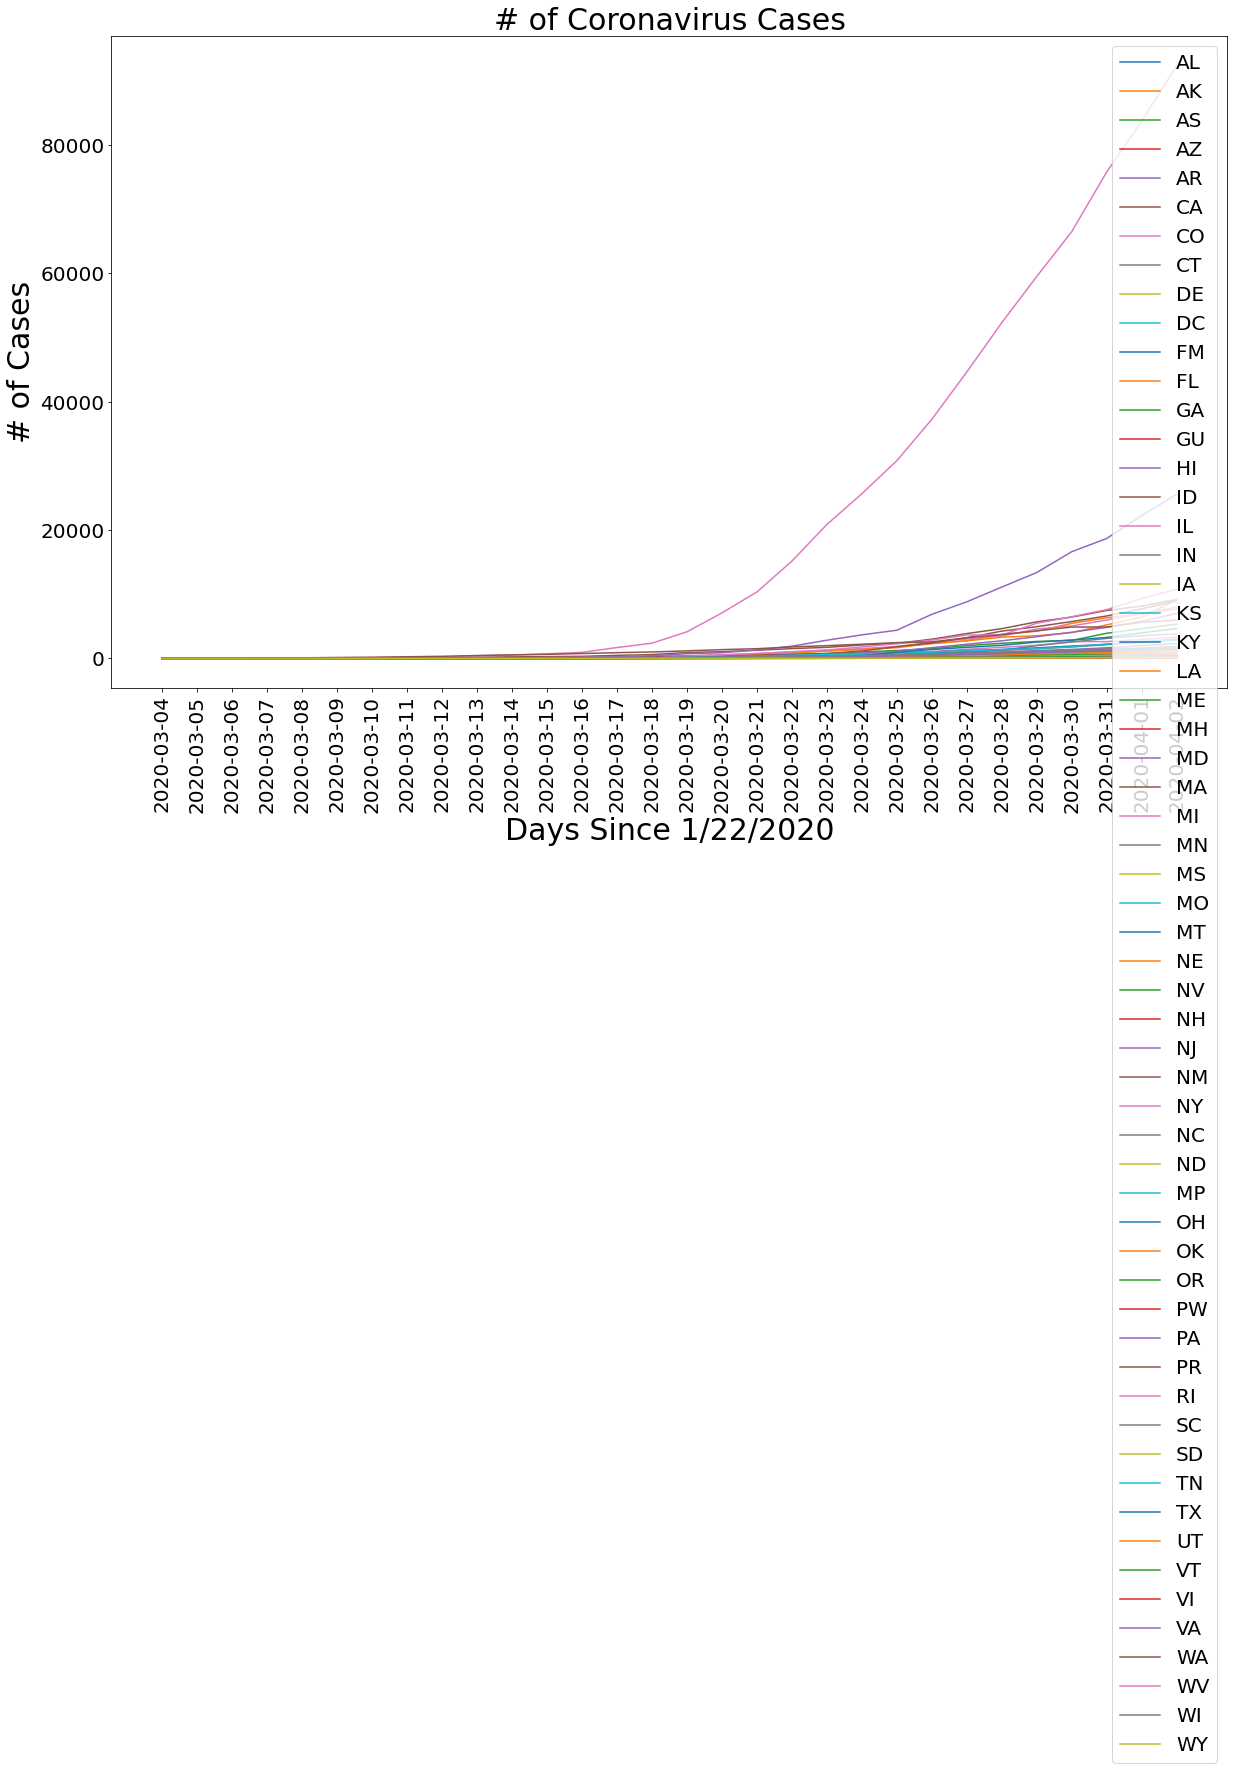

In [6]:


state_list

plt.figure(figsize=(20,12))
for state in state_list:
    x = pd.Series((date_values)).sort_values(axis = 0,ascending = True)
    y = pd.Series(df_by_state[state]["positive"]).sort_values(axis = 0,ascending = True)

    
    #print(y)
    plt.plot(x,y)

    plt.title('# of Coronavirus Cases', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(state_list, prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.xticks(rotation=90)

plt.show()


In [36]:
import plotly.express as px


fig = px.scatter(states_historical_df_pop, x="total", y="positive", animation_frame="date", animation_group="state",
           size="positive", color="state", hover_name="state",
           log_x=False, size_max=55, range_x=[0,250000], range_y=[0,100000])

layout = go.Layout(
    title=go.layout.Title(
        text="Total testing counts Vs Positive Counts over time",
        x=0.5
    ),
    font=dict(size=14),
#     width=800,
#     height=500,
    xaxis_title = "Total number of tests",
    yaxis_title = "Number of positive tests"
)

fig.update_layout(layout)
fig.show()
fig.write_html('positives_to_total_figure.html', auto_open=True)


In [35]:
fig = px.scatter(states_historical_df_pop, x="positive", y="death", animation_frame="date", animation_group="state",
           size="positive", color="state", hover_name="state",
           log_x=False, size_max=55, range_x=[0,100000], range_y=[0,3000])

layout = go.Layout(
    title=go.layout.Title(
        text="Positive test counts Vs deaths over time",
        x=0.5
    ),
    font=dict(size=14),
#     width=800,
#     height=500,
    xaxis_title = "Total number of positive tests",
    yaxis_title = "Number of deaths"
)

fig.update_layout(layout)
fig.show()
fig.write_html('deaths_to_positive_figure.html', auto_open=True)


In [37]:


fig = px.line(states_historical_df_pop, x="date", y="positive",
           color="state", hover_name="state")



fig.show()
fig.write_html('positive_tests_over_time_figure.html', auto_open=True)
